In [ ]:
# %%

# Use Google Colab
use_google_colab = False
# Process the training dataset
training_data_processing = False
# Train the model
model_training = True
# Validation the model
model_validation = True
# Load the model from your Google Drive or local file system
model_loading = False

import numpy as np
import torch

from util.cuda import cuda
from util.gpu_info import gpuInfo
from util.data_augmentation import training_data_loading, training_data_augmentation
from util.loss import BCEIoULoss
from util.training import train
from util.testing import submission_creating, test

from networks.LinkNetB7 import *
from networks.DLinkNet34 import *
from networks.DLinkNet50 import *
from networks.DLinkNet101 import *
from networks.LinkNet34 import *
from networks.UNet import *


path_training = "./training/"
path_testing = "./test/"
path_data = "./data/"
path_model = "./models/LinkNet34.model"

cuda_available = torch.cuda.is_available()
if cuda_available:
    print("CUDA is available. Utilize GPUs for computation")
    device = torch.device("cuda")
else:
    print("CUDA is not available. Utilize CPUs for computation.")
    device = torch.device("cpu")

gpu_info = gpuInfo()

model = LinkNet34()

if cuda_available:
    model.cuda()

print(model)

# The resolution of resized training images and the corresponding masks
training_resize = 512
# The number of resized training pairs used for data augmentation
training_number = 367
# The resolution of resized testing images
testing_resize = int(608 * training_resize / 400)
if testing_resize % 2 == 1:
    testing_resize += 1

if training_data_processing:
    # Load and generate the resized training dataset and validation dataset
    images_training, labels_training, images_validation, labels_validation = (
        training_data_loading(path_training, training_resize, training_number)
    )
    # Generate the augmented training dataset
    rotations = [0, 45, 90, 135]  # the rotation angle

    flips = ["original", np.flipud, np.fliplr]  # 'original', np.flipud, np.fliplr

    shifts = [(-16, 16)]

    images_augmented, labels_augmented = training_data_augmentation(
        images_training, labels_training, rotations, flips, shifts, training_resize
    )
    # Save the augmented training dataset and resized validation dataset
    # to your Google Drive or local file system
    np.save(f"{path_data}images_training", images_augmented)
    np.save(f"{path_data}labels_training", labels_augmented)
    np.save(f"{path_data}images_validation", images_validation)
    np.save(f"{path_data}labels_validation", labels_validation)
elif not model_loading:
    # Load the augmented training dataset and resized validation dataset
    # from your Google Drive or local file system
    images_augmented = np.load(f"{path_data}images_training.npy")
    labels_augmented = np.load(f"{path_data}labels_training.npy")
    images_validation = np.load(f"{path_data}images_validation.npy")
    labels_validation = np.load(f"{path_data}labels_validation.npy")

if model_training:
    print(f"\nimages_training.shape = {images_augmented.shape}")
    print(f"labels_training.shape = {labels_augmented.shape}")
    print(f"images_validation.shape = {images_validation.shape}")
    print(f"labels_validation.shape = {labels_validation.shape}")

CUDA is available. Utilize GPUs for computation
Mon Nov 11 10:48:52 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 555.42.06              Driver Version: 555.42.06      CUDA Version: 12.5     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4080        Off |   00000000:01:00.0  On |                  N/A |
|  0%   39C    P8             18W /  340W |     286MiB /  16376MiB |     11%      Default |
|                                         |                        |                  N/A |


/home/wesley/miniconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/wesley/miniconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


LinkNet34(
  (input_block): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  )
  (encoder1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    

/home/wesley/miniconda3/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
  0%|          | 0/20 [00:00<?, ?it/s]


---------Training for Epoch 1 starting:---------
→ Running_loss for Batch 1: 0.3856655955314636
→ ACC for Batch 1: 0.9484014511108398
→ Running_loss for Batch 21: 0.39118292927742004
→ ACC for Batch 21: 0.9780473709106445
→ Running_loss for Batch 41: 0.36019468307495117
→ ACC for Batch 41: 0.9592552185058594
→ Running_loss for Batch 61: 0.30963781476020813
→ ACC for Batch 61: 0.9667987823486328
→ Running_loss for Batch 81: 0.3087289333343506
→ ACC for Batch 81: 0.9672966003417969
→ Running_loss for Batch 101: 0.3022637367248535
→ ACC for Batch 101: 0.9588794708251953
→ Running_loss for Batch 121: 0.3457922339439392
→ ACC for Batch 121: 0.9767522811889648
→ Running_loss for Batch 141: 0.2809421718120575
→ ACC for Batch 141: 0.9762392044067383
→ Running_loss for Batch 161: 0.271782785654068
→ ACC for Batch 161: 0.9667835235595703
→ Running_loss for Batch 181: 0.2894482910633087
→ ACC for Batch 181: 0.9689044952392578
→ Running_loss for Batch 201: 0.23981210589408875
→ ACC for Batch 201:

  5%|▌         | 1/20 [08:00<2:32:15, 480.81s/it]


---------Training for Epoch 2 starting:---------
→ Running_loss for Batch 1: 0.14885984361171722
→ ACC for Batch 1: 0.9771890640258789
→ Running_loss for Batch 21: 0.13696937263011932
→ ACC for Batch 21: 0.9819765090942383
→ Running_loss for Batch 41: 0.16184033453464508
→ ACC for Batch 41: 0.9836530685424805
→ Running_loss for Batch 61: 0.16973283886909485
→ ACC for Batch 61: 0.987823486328125
→ Running_loss for Batch 81: 0.15734875202178955
→ ACC for Batch 81: 0.9795684814453125
→ Running_loss for Batch 101: 0.15507616102695465
→ ACC for Batch 101: 0.9834356307983398
→ Running_loss for Batch 121: 0.16146168112754822
→ ACC for Batch 121: 0.9905586242675781
→ Running_loss for Batch 141: 0.15473437309265137
→ ACC for Batch 141: 0.9871597290039062
→ Running_loss for Batch 161: 0.20052504539489746
→ ACC for Batch 161: 0.9813270568847656
→ Running_loss for Batch 181: 0.16762356460094452
→ ACC for Batch 181: 0.9894313812255859
→ Running_loss for Batch 201: 0.18888363242149353
→ ACC for Bat

 10%|█         | 2/20 [12:28<1:46:42, 355.67s/it]


---------Training for Epoch 3 starting:---------
→ Running_loss for Batch 1: 0.16699250042438507
→ ACC for Batch 1: 0.9908237457275391
→ Running_loss for Batch 21: 0.12855090200901031
→ ACC for Batch 21: 0.985987663269043
→ Running_loss for Batch 41: 0.1409682035446167
→ ACC for Batch 41: 0.9913616180419922
→ Running_loss for Batch 61: 0.16982190310955048
→ ACC for Batch 61: 0.9884977340698242
→ Running_loss for Batch 81: 0.1169794350862503
→ ACC for Batch 81: 0.9917173385620117
→ Running_loss for Batch 101: 0.11004580557346344
→ ACC for Batch 101: 0.9924774169921875
→ Running_loss for Batch 121: 0.17223453521728516
→ ACC for Batch 121: 0.9959297180175781
→ Running_loss for Batch 141: 0.1343689113855362
→ ACC for Batch 141: 0.9892864227294922
→ Running_loss for Batch 161: 0.17909324169158936
→ ACC for Batch 161: 0.9856691360473633
→ Running_loss for Batch 181: 0.1432400643825531
→ ACC for Batch 181: 0.9913349151611328
→ Running_loss for Batch 201: 0.16083727777004242
→ ACC for Batch 2

 15%|█▌        | 3/20 [16:58<1:29:35, 316.21s/it]


---------Training for Epoch 4 starting:---------
→ Running_loss for Batch 1: 0.12977635860443115
→ ACC for Batch 1: 0.9799213409423828
→ Running_loss for Batch 21: 0.14825595915317535
→ ACC for Batch 21: 0.9910726547241211
→ Running_loss for Batch 41: 0.12382086366415024
→ ACC for Batch 41: 0.9809904098510742
→ Running_loss for Batch 61: 0.17241883277893066
→ ACC for Batch 61: 0.9835500717163086
→ Running_loss for Batch 81: 0.152409628033638
→ ACC for Batch 81: 0.9811334609985352
→ Running_loss for Batch 101: 0.1543007344007492
→ ACC for Batch 101: 0.9920425415039062
→ Running_loss for Batch 121: 0.13320307433605194
→ ACC for Batch 121: 0.9868192672729492
→ Running_loss for Batch 141: 0.1415640115737915
→ ACC for Batch 141: 0.9897089004516602
→ Running_loss for Batch 161: 0.15287761390209198
→ ACC for Batch 161: 0.991389274597168
→ Running_loss for Batch 181: 0.13531766831874847
→ ACC for Batch 181: 0.986480712890625
→ Running_loss for Batch 201: 0.11199343204498291
→ ACC for Batch 20

 20%|██        | 4/20 [21:04<1:17:00, 288.76s/it]


---------Training for Epoch 5 starting:---------
→ Running_loss for Batch 1: 0.13445685803890228
→ ACC for Batch 1: 0.9870519638061523
→ Running_loss for Batch 21: 0.18835917115211487
→ ACC for Batch 21: 0.9881734848022461
→ Running_loss for Batch 41: 0.11652129888534546
→ ACC for Batch 41: 0.9954757690429688
→ Running_loss for Batch 61: 0.16545462608337402
→ ACC for Batch 61: 0.9767732620239258
→ Running_loss for Batch 81: 0.10902360081672668
→ ACC for Batch 81: 0.9873666763305664
→ Running_loss for Batch 101: 0.12364660948514938
→ ACC for Batch 101: 0.9935588836669922
→ Running_loss for Batch 121: 0.13515892624855042
→ ACC for Batch 121: 0.9846811294555664
→ Running_loss for Batch 141: 0.10775657743215561
→ ACC for Batch 141: 0.9863491058349609
→ Running_loss for Batch 161: 0.10656782984733582
→ ACC for Batch 161: 0.9880971908569336
→ Running_loss for Batch 181: 0.11759120970964432
→ ACC for Batch 181: 0.9928131103515625
→ Running_loss for Batch 201: 0.16647528111934662
→ ACC for Ba

 25%|██▌       | 5/20 [25:18<1:09:01, 276.11s/it]


---------Training for Epoch 6 starting:---------
→ Running_loss for Batch 1: 0.12439635396003723
→ ACC for Batch 1: 0.9899425506591797
→ Running_loss for Batch 21: 0.1482461541891098
→ ACC for Batch 21: 0.9802427291870117
→ Running_loss for Batch 41: 0.136678084731102
→ ACC for Batch 41: 0.9873466491699219
→ Running_loss for Batch 61: 0.1353827714920044
→ ACC for Batch 61: 0.9880800247192383
→ Running_loss for Batch 81: 0.11698680371046066
→ ACC for Batch 81: 0.9904823303222656
→ Running_loss for Batch 101: 0.11942458152770996
→ ACC for Batch 101: 0.9911651611328125
→ Running_loss for Batch 121: 0.13559094071388245
→ ACC for Batch 121: 0.9941596984863281
→ Running_loss for Batch 141: 0.1345294564962387
→ ACC for Batch 141: 0.993250846862793
→ Running_loss for Batch 161: 0.1196579858660698
→ ACC for Batch 161: 0.9902667999267578
→ Running_loss for Batch 181: 0.16982898116111755
→ ACC for Batch 181: 0.9906768798828125
→ Running_loss for Batch 201: 0.15217067301273346
→ ACC for Batch 201

 30%|███       | 6/20 [29:37<1:03:04, 270.31s/it]


---------Training for Epoch 7 starting:---------
→ Running_loss for Batch 1: 0.10755647718906403
→ ACC for Batch 1: 0.9906101226806641
→ Running_loss for Batch 21: 0.10720710456371307
→ ACC for Batch 21: 0.988433837890625
→ Running_loss for Batch 41: 0.11303851753473282
→ ACC for Batch 41: 0.9938726425170898
→ Running_loss for Batch 61: 0.1333727240562439
→ ACC for Batch 61: 0.9956398010253906
→ Running_loss for Batch 81: 0.09881988912820816
→ ACC for Batch 81: 0.990748405456543
→ Running_loss for Batch 101: 0.11932402104139328
→ ACC for Batch 101: 0.9787197113037109
→ Running_loss for Batch 121: 0.14356014132499695
→ ACC for Batch 121: 0.9815912246704102
→ Running_loss for Batch 141: 0.11593444645404816
→ ACC for Batch 141: 0.9899778366088867
→ Running_loss for Batch 161: 0.10312546044588089
→ ACC for Batch 161: 0.989659309387207
→ Running_loss for Batch 181: 0.13549409806728363
→ ACC for Batch 181: 0.9919595718383789
→ Running_loss for Batch 201: 0.13227298855781555
→ ACC for Batch 

 35%|███▌      | 7/20 [33:46<57:04, 263.42s/it]  


---------Training for Epoch 8 starting:---------
→ Running_loss for Batch 1: 0.0895424485206604
→ ACC for Batch 1: 0.9947471618652344
→ Running_loss for Batch 21: 0.12344499677419662
→ ACC for Batch 21: 0.9926843643188477
→ Running_loss for Batch 41: 0.10929153859615326
→ ACC for Batch 41: 0.9919223785400391
→ Running_loss for Batch 61: 0.1492549329996109
→ ACC for Batch 61: 0.9823627471923828
→ Running_loss for Batch 81: 0.1279621124267578
→ ACC for Batch 81: 0.9937152862548828
→ Running_loss for Batch 101: 0.10644063353538513
→ ACC for Batch 101: 0.9936056137084961
→ Running_loss for Batch 121: 0.13004794716835022
→ ACC for Batch 121: 0.988947868347168
→ Running_loss for Batch 141: 0.1075013056397438
→ ACC for Batch 141: 0.9940977096557617
→ Running_loss for Batch 161: 0.11417516320943832
→ ACC for Batch 161: 0.9894771575927734
→ Running_loss for Batch 181: 0.0863097682595253
→ ACC for Batch 181: 0.9926519393920898
→ Running_loss for Batch 201: 0.10489953309297562
→ ACC for Batch 20

 40%|████      | 8/20 [37:56<51:47, 258.95s/it]


---------Training for Epoch 9 starting:---------
→ Running_loss for Batch 1: 0.10400813817977905
→ ACC for Batch 1: 0.9895906448364258
→ Running_loss for Batch 21: 0.0815797671675682
→ ACC for Batch 21: 0.9935340881347656
→ Running_loss for Batch 41: 0.0985746830701828
→ ACC for Batch 41: 0.9891767501831055
→ Running_loss for Batch 61: 0.12353519350290298
→ ACC for Batch 61: 0.9890689849853516
→ Running_loss for Batch 81: 0.11898479610681534
→ ACC for Batch 81: 0.9846181869506836
→ Running_loss for Batch 101: 0.1455451250076294
→ ACC for Batch 101: 0.9839410781860352
→ Running_loss for Batch 121: 0.11849040538072586
→ ACC for Batch 121: 0.9860897064208984
→ Running_loss for Batch 141: 0.09860178083181381
→ ACC for Batch 141: 0.9887933731079102
→ Running_loss for Batch 161: 0.10393276810646057
→ ACC for Batch 161: 0.9900064468383789
→ Running_loss for Batch 181: 0.08669498562812805
→ ACC for Batch 181: 0.9887962341308594
→ Running_loss for Batch 201: 0.12780791521072388
→ ACC for Batch

 45%|████▌     | 9/20 [42:19<47:44, 260.41s/it]

Validation loss for Epoch 9: 0.11784239858388901

Acurácia de validação: 0.9887912197718545
F1-score de validação: 0.786870532176953
IoU de validação: 0.9800048905166042

---------Training for Epoch 10 starting:---------
→ Running_loss for Batch 1: 0.11810405552387238
→ ACC for Batch 1: 0.9850912094116211
→ Running_loss for Batch 21: 0.14081043004989624
→ ACC for Batch 21: 0.9954500198364258
→ Running_loss for Batch 41: 0.12926629185676575
→ ACC for Batch 41: 0.9889535903930664
→ Running_loss for Batch 61: 0.09320703893899918
→ ACC for Batch 61: 0.9946088790893555
→ Running_loss for Batch 81: 0.10997654497623444
→ ACC for Batch 81: 0.9933662414550781
→ Running_loss for Batch 101: 0.11778324097394943
→ ACC for Batch 101: 0.9870214462280273
→ Running_loss for Batch 121: 0.1006515696644783
→ ACC for Batch 121: 0.9849576950073242
→ Running_loss for Batch 141: 0.0927739068865776
→ ACC for Batch 141: 0.992375373840332
→ Running_loss for Batch 161: 0.11283506453037262
→ ACC for Batch 161: 0.9

 50%|█████     | 10/20 [46:32<43:00, 258.00s/it]


---------Training for Epoch 11 starting:---------
→ Running_loss for Batch 1: 0.09140988439321518
→ ACC for Batch 1: 0.991490364074707
→ Running_loss for Batch 21: 0.12939238548278809
→ ACC for Batch 21: 0.9815778732299805
→ Running_loss for Batch 41: 0.1211218386888504
→ ACC for Batch 41: 0.9951572418212891
→ Running_loss for Batch 61: 0.10040976852178574
→ ACC for Batch 61: 0.9887380599975586
→ Running_loss for Batch 81: 0.08088167011737823
→ ACC for Batch 81: 0.9949607849121094
→ Running_loss for Batch 101: 0.11146491765975952
→ ACC for Batch 101: 0.9951848983764648
→ Running_loss for Batch 121: 0.09818019717931747
→ ACC for Batch 121: 0.9913225173950195
→ Running_loss for Batch 141: 0.09420425444841385
→ ACC for Batch 141: 0.9889316558837891
→ Running_loss for Batch 161: 0.07225324958562851
→ ACC for Batch 161: 0.9895896911621094
→ Running_loss for Batch 181: 0.09920406341552734
→ ACC for Batch 181: 0.9893198013305664
→ Running_loss for Batch 201: 0.10351328551769257
→ ACC for Bat

 55%|█████▌    | 11/20 [50:58<39:03, 260.37s/it]


---------Training for Epoch 12 starting:---------
→ Running_loss for Batch 1: 0.07803703844547272
→ ACC for Batch 1: 0.9922780990600586
→ Running_loss for Batch 21: 0.08946501463651657
→ ACC for Batch 21: 0.9940309524536133
→ Running_loss for Batch 41: 0.10608391463756561
→ ACC for Batch 41: 0.9931888580322266
→ Running_loss for Batch 61: 0.09812378138303757
→ ACC for Batch 61: 0.9898147583007812
→ Running_loss for Batch 81: 0.11139140278100967
→ ACC for Batch 81: 0.9951362609863281
→ Running_loss for Batch 101: 0.07468544691801071
→ ACC for Batch 101: 0.9900979995727539
→ Running_loss for Batch 121: 0.09002365916967392
→ ACC for Batch 121: 0.9965667724609375
→ Running_loss for Batch 141: 0.07298510521650314
→ ACC for Batch 141: 0.9938955307006836
→ Running_loss for Batch 161: 0.0720929205417633
→ ACC for Batch 161: 0.9886531829833984
→ Running_loss for Batch 181: 0.10901466757059097
→ ACC for Batch 181: 0.9939441680908203
→ Running_loss for Batch 201: 0.07701382040977478
→ ACC for Ba

 60%|██████    | 12/20 [55:19<34:45, 260.64s/it]


---------Training for Epoch 13 starting:---------
→ Running_loss for Batch 1: 0.08424931019544601
→ ACC for Batch 1: 0.9943885803222656
→ Running_loss for Batch 21: 0.08760280162096024
→ ACC for Batch 21: 0.9919986724853516
→ Running_loss for Batch 41: 0.10317481309175491
→ ACC for Batch 41: 0.9929428100585938
→ Running_loss for Batch 61: 0.07564254105091095
→ ACC for Batch 61: 0.9915590286254883
→ Running_loss for Batch 81: 0.07053590565919876
→ ACC for Batch 81: 0.9935550689697266
→ Running_loss for Batch 101: 0.1050758957862854
→ ACC for Batch 101: 0.9947242736816406
→ Running_loss for Batch 121: 0.1158495843410492
→ ACC for Batch 121: 0.9829444885253906
→ Running_loss for Batch 141: 0.08757006376981735
→ ACC for Batch 141: 0.9902286529541016
→ Running_loss for Batch 161: 0.10115199536085129
→ ACC for Batch 161: 0.9922456741333008
→ Running_loss for Batch 181: 0.06343484669923782
→ ACC for Batch 181: 0.9956436157226562
→ Running_loss for Batch 201: 0.09225596487522125
→ ACC for Bat

 65%|██████▌   | 13/20 [59:38<30:21, 260.21s/it]


---------Training for Epoch 14 starting:---------
→ Running_loss for Batch 1: 0.11081578582525253
→ ACC for Batch 1: 0.9950675964355469
→ Running_loss for Batch 21: 0.07631657272577286
→ ACC for Batch 21: 0.9928970336914062
→ Running_loss for Batch 41: 0.09042526036500931
→ ACC for Batch 41: 0.9929513931274414
→ Running_loss for Batch 61: 0.06558099389076233
→ ACC for Batch 61: 0.9943141937255859
→ Running_loss for Batch 81: 0.08893033862113953
→ ACC for Batch 81: 0.9948549270629883
→ Running_loss for Batch 101: 0.09361410140991211
→ ACC for Batch 101: 0.9938449859619141
→ Running_loss for Batch 121: 0.08849755674600601
→ ACC for Batch 121: 0.9952068328857422
→ Running_loss for Batch 141: 0.07235656678676605
→ ACC for Batch 141: 0.9866771697998047
→ Running_loss for Batch 161: 0.06986062228679657
→ ACC for Batch 161: 0.9926033020019531
→ Running_loss for Batch 181: 0.08495525270700455
→ ACC for Batch 181: 0.9895362854003906
→ Running_loss for Batch 201: 0.0768679529428482
→ ACC for Ba

 70%|███████   | 14/20 [1:04:02<26:08, 261.35s/it]


---------Training for Epoch 15 starting:---------
→ Running_loss for Batch 1: 0.0782516673207283
→ ACC for Batch 1: 0.9943466186523438
→ Running_loss for Batch 21: 0.0693448930978775
→ ACC for Batch 21: 0.9954042434692383
→ Running_loss for Batch 41: 0.07205676287412643
→ ACC for Batch 41: 0.9900331497192383
→ Running_loss for Batch 61: 0.06451897323131561
→ ACC for Batch 61: 0.9942750930786133
→ Running_loss for Batch 81: 0.10827363282442093
→ ACC for Batch 81: 0.9980487823486328
→ Running_loss for Batch 101: 0.0711415559053421
→ ACC for Batch 101: 0.9949846267700195
→ Running_loss for Batch 121: 0.08783536404371262
→ ACC for Batch 121: 0.9944686889648438
→ Running_loss for Batch 141: 0.06400423496961594
→ ACC for Batch 141: 0.992279052734375
→ Running_loss for Batch 161: 0.08474832773208618
→ ACC for Batch 161: 0.9909191131591797
→ Running_loss for Batch 181: 0.07972902804613113
→ ACC for Batch 181: 0.9950370788574219
→ Running_loss for Batch 201: 0.079436756670475
→ ACC for Batch 2

 75%|███████▌  | 15/20 [1:08:38<22:08, 265.60s/it]


---------Training for Epoch 16 starting:---------
→ Running_loss for Batch 1: 0.06987053155899048
→ ACC for Batch 1: 0.9925174713134766
→ Running_loss for Batch 21: 0.08336571604013443
→ ACC for Batch 21: 0.9820480346679688
→ Running_loss for Batch 41: 0.08862593024969101
→ ACC for Batch 41: 0.9926185607910156
→ Running_loss for Batch 61: 0.08242934942245483
→ ACC for Batch 61: 0.9896621704101562
→ Running_loss for Batch 81: 0.0742262527346611
→ ACC for Batch 81: 0.994171142578125
→ Running_loss for Batch 101: 0.09050800651311874
→ ACC for Batch 101: 0.9858198165893555
→ Running_loss for Batch 121: 0.10944419354200363
→ ACC for Batch 121: 0.9894800186157227
→ Running_loss for Batch 141: 0.09649303555488586
→ ACC for Batch 141: 0.9943408966064453
→ Running_loss for Batch 161: 0.08905034512281418
→ ACC for Batch 161: 0.9933948516845703
→ Running_loss for Batch 181: 0.06191461160778999
→ ACC for Batch 181: 0.9956998825073242
→ Running_loss for Batch 201: 0.09193618595600128
→ ACC for Bat

 80%|████████  | 16/20 [1:13:06<17:46, 266.59s/it]


---------Training for Epoch 17 starting:---------
→ Running_loss for Batch 1: 0.09118346124887466
→ ACC for Batch 1: 0.99774169921875
→ Running_loss for Batch 21: 0.09064896404743195
→ ACC for Batch 21: 0.988612174987793
→ Running_loss for Batch 41: 0.10876713693141937
→ ACC for Batch 41: 0.9864664077758789
→ Running_loss for Batch 61: 0.06826295703649521
→ ACC for Batch 61: 0.9945230484008789
→ Running_loss for Batch 81: 0.09028360247612
→ ACC for Batch 81: 0.9930505752563477
→ Running_loss for Batch 101: 0.08982708305120468
→ ACC for Batch 101: 0.9954309463500977
→ Running_loss for Batch 121: 0.10160326957702637
→ ACC for Batch 121: 0.9894771575927734
→ Running_loss for Batch 141: 0.07584980875253677
→ ACC for Batch 141: 0.9969825744628906
→ Running_loss for Batch 161: 0.08018442988395691
→ ACC for Batch 161: 0.9941902160644531
→ Running_loss for Batch 181: 0.07270664721727371
→ ACC for Batch 181: 0.9926300048828125
→ Running_loss for Batch 201: 0.05711549147963524
→ ACC for Batch 2

 85%|████████▌ | 17/20 [1:17:24<13:11, 263.84s/it]


---------Training for Epoch 18 starting:---------
→ Running_loss for Batch 1: 0.07365535944700241
→ ACC for Batch 1: 0.9933071136474609
→ Running_loss for Batch 21: 0.08090022951364517
→ ACC for Batch 21: 0.9887323379516602
→ Running_loss for Batch 41: 0.06484316289424896
→ ACC for Batch 41: 0.993464469909668
→ Running_loss for Batch 61: 0.07132275402545929
→ ACC for Batch 61: 0.9954185485839844
→ Running_loss for Batch 81: 0.05910014361143112
→ ACC for Batch 81: 0.995814323425293
→ Running_loss for Batch 101: 0.09831390529870987
→ ACC for Batch 101: 0.9913406372070312
→ Running_loss for Batch 121: 0.11375255137681961
→ ACC for Batch 121: 0.9984006881713867
→ Running_loss for Batch 141: 0.06578274071216583
→ ACC for Batch 141: 0.9905481338500977
→ Running_loss for Batch 161: 0.06926900893449783
→ ACC for Batch 161: 0.9944067001342773
→ Running_loss for Batch 181: 0.09000629186630249
→ ACC for Batch 181: 0.9958629608154297
→ Running_loss for Batch 201: 0.0718034878373146
→ ACC for Batc

 90%|█████████ | 18/20 [1:21:57<08:53, 266.62s/it]


---------Training for Epoch 19 starting:---------
→ Running_loss for Batch 1: 0.06049702316522598
→ ACC for Batch 1: 0.9975528717041016
→ Running_loss for Batch 21: 0.06494168937206268
→ ACC for Batch 21: 0.9922571182250977
→ Running_loss for Batch 41: 0.06259343028068542
→ ACC for Batch 41: 0.9906902313232422
→ Running_loss for Batch 61: 0.06842305511236191
→ ACC for Batch 61: 0.9967708587646484
→ Running_loss for Batch 81: 0.06664098799228668
→ ACC for Batch 81: 0.9939327239990234
→ Running_loss for Batch 101: 0.06139964237809181
→ ACC for Batch 101: 0.9955902099609375
→ Running_loss for Batch 121: 0.08843347430229187
→ ACC for Batch 121: 0.9921054840087891
→ Running_loss for Batch 141: 0.0716496929526329
→ ACC for Batch 141: 0.995793342590332
→ Running_loss for Batch 161: 0.08755769580602646
→ ACC for Batch 161: 0.9952211380004883
→ Running_loss for Batch 181: 0.06759659200906754
→ ACC for Batch 181: 0.9917831420898438
→ Running_loss for Batch 201: 0.08178688585758209
→ ACC for Bat

 95%|█████████▌| 19/20 [1:26:24<04:26, 266.61s/it]


---------Training for Epoch 20 starting:---------
→ Running_loss for Batch 1: 0.06625150144100189
→ ACC for Batch 1: 0.9945459365844727
→ Running_loss for Batch 21: 0.08666697889566422
→ ACC for Batch 21: 0.9965276718139648
→ Running_loss for Batch 41: 0.08756892383098602
→ ACC for Batch 41: 0.993372917175293
→ Running_loss for Batch 61: 0.06989818066358566
→ ACC for Batch 61: 0.9965391159057617
→ Running_loss for Batch 81: 0.07572635263204575
→ ACC for Batch 81: 0.9937152862548828
→ Running_loss for Batch 101: 0.07175242900848389
→ ACC for Batch 101: 0.9941177368164062
→ Running_loss for Batch 121: 0.0634114220738411
→ ACC for Batch 121: 0.9934864044189453
→ Running_loss for Batch 141: 0.07704314589500427
→ ACC for Batch 141: 0.9937725067138672
→ Running_loss for Batch 161: 0.0849006325006485
→ ACC for Batch 161: 0.9981117248535156
→ Running_loss for Batch 181: 0.062348250299692154
→ ACC for Batch 181: 0.9952611923217773
→ Running_loss for Batch 201: 0.07921689003705978
→ ACC for Bat

100%|██████████| 20/20 [1:30:46<00:00, 272.30s/it]


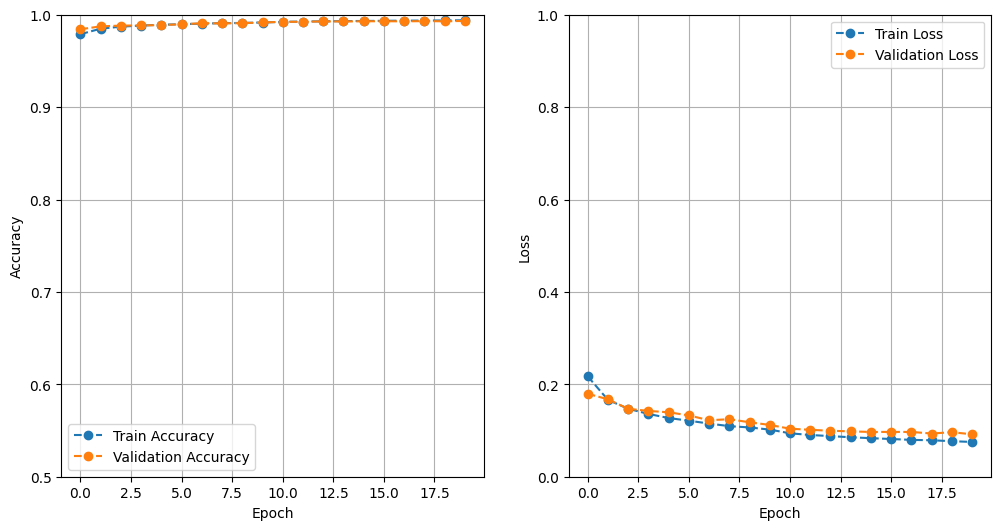

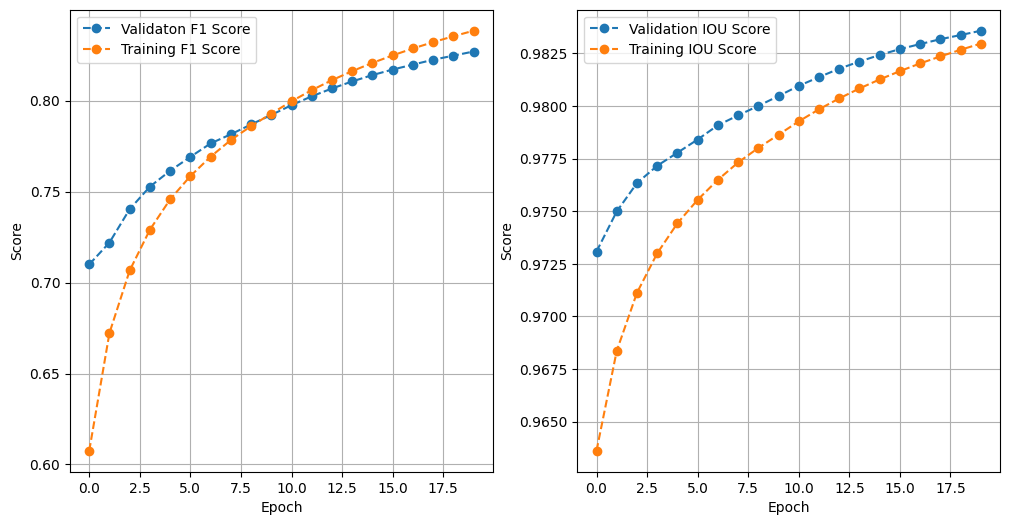

In [ ]:
# %%

if model_training:
    train(
        model,
        images_augmented,
        labels_augmented,
        images_validation,
        labels_validation,
        loss_func=BCEIoULoss(),
        batch_size=4,
        learning_rate=2e-4,
        epochs=20,
        model_validation=model_validation,
        cuda_available=cuda_available,
        path_model=path_model,
    )

if model_loading:
    # Load the model from your Google Drive or local file system
    checkpoint = torch.load(path_model)
    model.load_state_dict(checkpoint["model_state_dict"])

In [ ]:
# %%

submission = submission_creating(
    model, path_testing, training_resize, testing_resize, cuda_available
)

100%|██████████| 5/5 [00:00<00:00,  5.59it/s]


In [ ]:
# %%

np.savetxt("submit.csv", submission, delimiter=",", fmt="%s")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.1218894].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0033040235..1.0953382].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0004824306..1.075873].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0608498].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0760508].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.3341668].


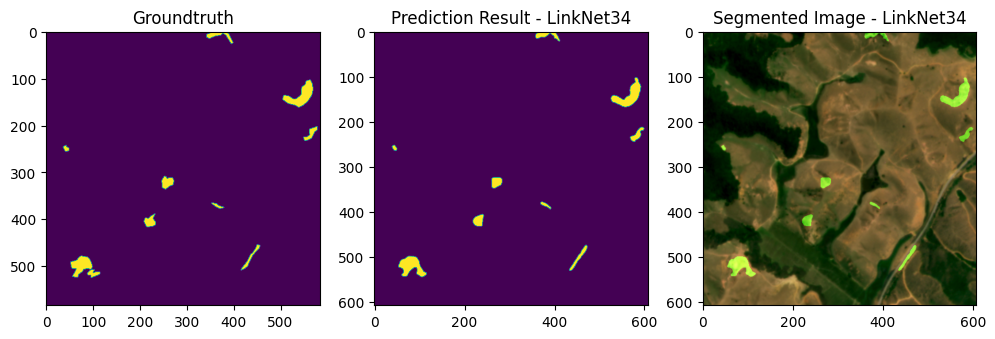

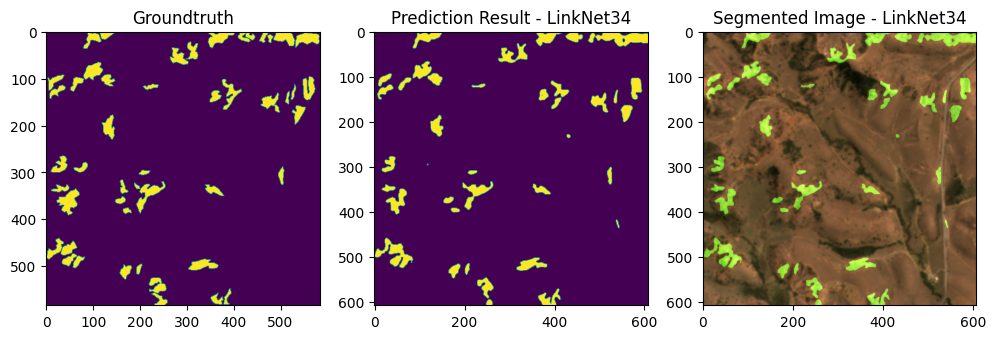

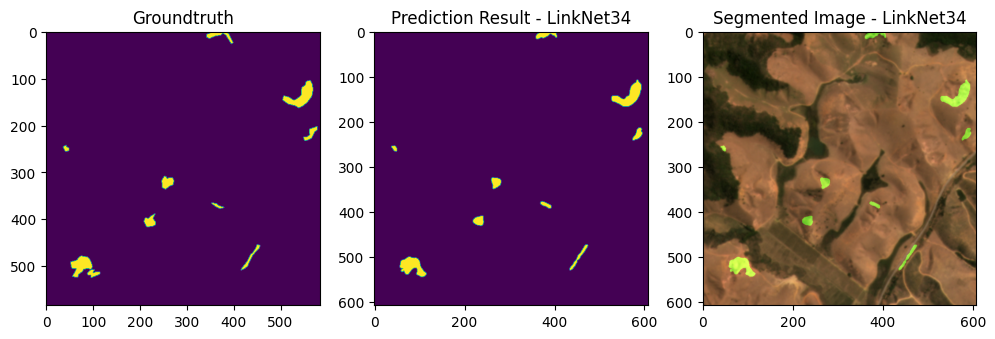

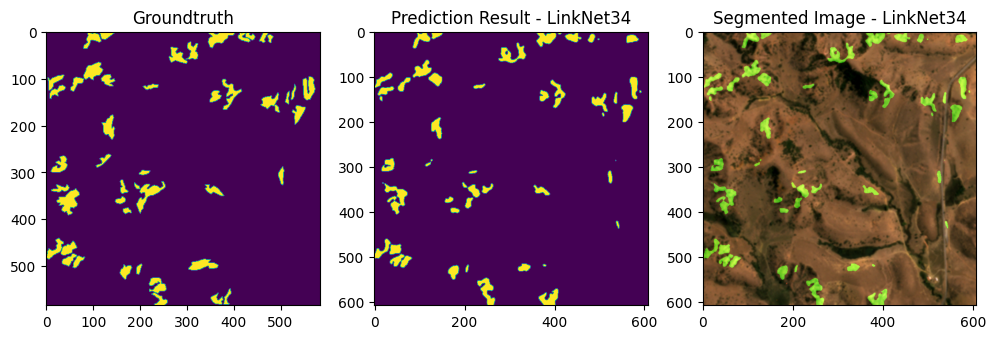

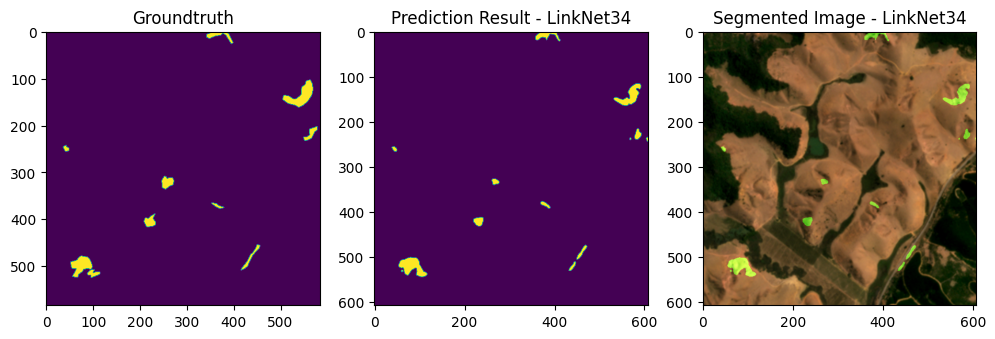

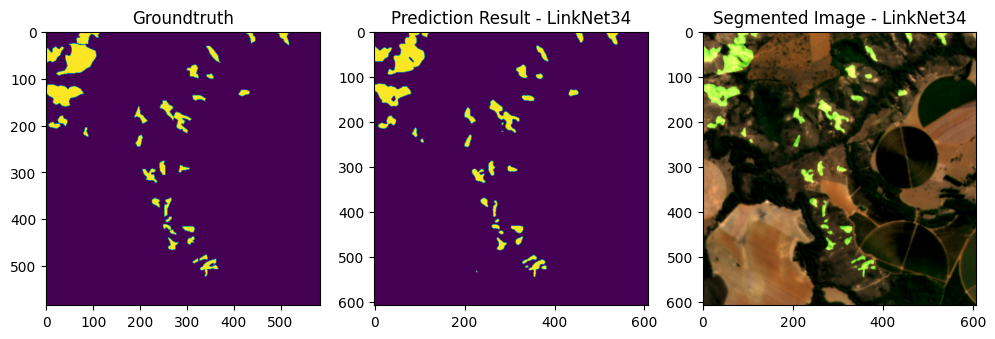

In [ ]:
# %%

for aux in range(747, 753):
    test(path_testing, aux, model, cuda_available)